
## Data Description : 
You can find the data description over here.

**https://www.kaggle.com/akashkr/phishing-url-eda-and-modelling?scriptVersionId=37761815&cellId=1**

In [1]:
# Importing all the required libraries

import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt # to plot the figures 
from sklearn.model_selection import train_test_split # to split the data into train and test

# Importing the classification models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Importing the metrics
from sklearn.metrics import classification_report,roc_curve, roc_auc_score, auc, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("dataset_phishing.csv") # loading the dataset

In [3]:
data.head() # to see the top 5 rows of the dataframe

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [4]:
data.shape # (the length of the dataset, number of columns)

(11430, 89)

In [5]:
print(data.isna().sum()/len(data)) # percentage of missing values

url                0.0
length_url         0.0
length_hostname    0.0
ip                 0.0
nb_dots            0.0
                  ... 
web_traffic        0.0
dns_record         0.0
google_index       0.0
page_rank          0.0
status             0.0
Length: 89, dtype: float64


In [6]:
len(data.url.unique()) # to check that every webiste is unique

11429

In [7]:
data.describe() # description of the dataset

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [8]:
data.info() # to observe the null values and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## EDA: Exploratory Data Analysis

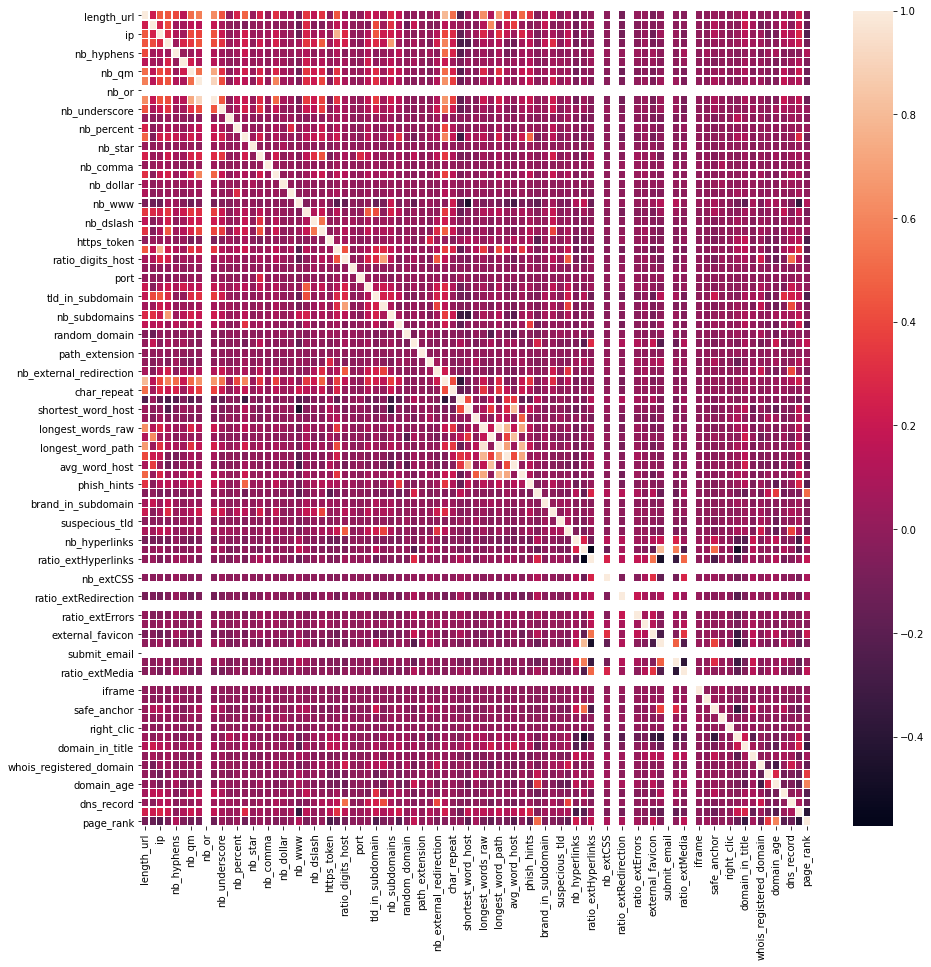

In [9]:
# observing the correlation of features
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), linewidths=.5)
plt.show()

In [10]:
data['status'].value_counts() # to observe the number of legitimate and phishing rows we have. Data is balanced

phishing      5715
legitimate    5715
Name: status, dtype: int64

In [11]:
legitimate_data = data[data['status']=='legitimate']
phishing_data = data[data['status']=="phishing"]

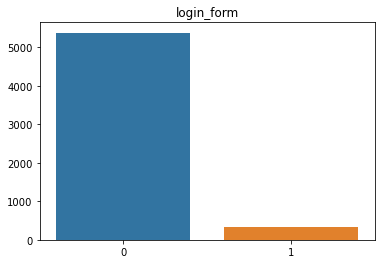

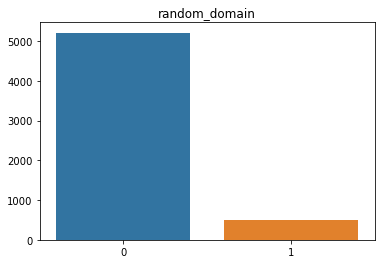

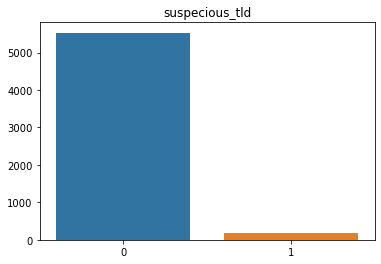

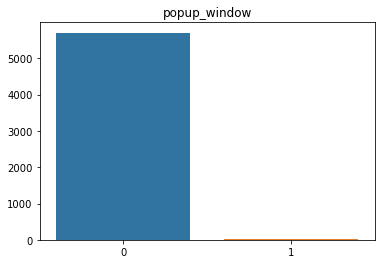

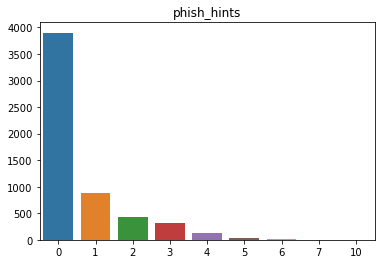

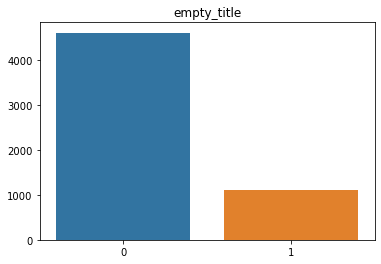

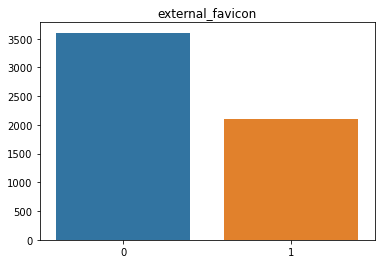

In [12]:
# Let's see if we can see differentiate the websites
for col in ['login_form', 'random_domain', 'suspecious_tld', 'popup_window', 'phish_hints', 'empty_title', 'external_favicon']:
    sns.barplot(x = phishing_data[col].value_counts().index,
            y = phishing_data[col].value_counts().values)

    plt.title(col)
    plt.show()

### We can observe that the websites are really hard to differentiate. But still key differences will be there like length of the hostname

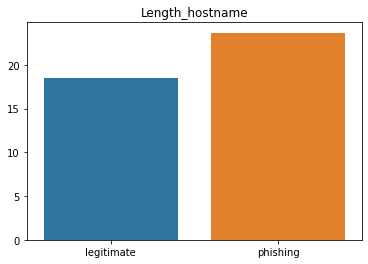

In [13]:
lengths = {
    "legitimate": np.mean(legitimate_data['length_hostname']),
    "phishing": np.mean(phishing_data['length_hostname'])
}

sns.barplot(x = list(lengths.keys()),
            y = list(lengths.values()))

plt.title("Length_hostname")
plt.show()

In [14]:
# Splitting the data into training and testing !


Y = data['status']
X = data.drop("status", axis = 1)

# encoding the target variable
Y = Y.map({'legitimate':0,'phishing':1})

# mentioning the stratify field to get the data balance while splitting 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify=data['status']) 

In [15]:
x_train.shape, x_test.shape

((8001, 88), (3429, 88))

In [16]:
y_train.value_counts(), y_test.value_counts() # should have the data balance 

(1    4001
 0    4000
 Name: status, dtype: int64,
 0    1715
 1    1714
 Name: status, dtype: int64)

In [17]:
# considering only numerical features
numerical_features = [col for col in x_train.columns if data[col].dtype!="O"]
x_train = x_train[numerical_features]
x_test = x_test[numerical_features]

## Feature Selection:
- Using RandomForestClassifier.feature_importances_ 

In [18]:
random_forest = RandomForestClassifier()

random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [19]:
feature_importances = random_forest.feature_importances_

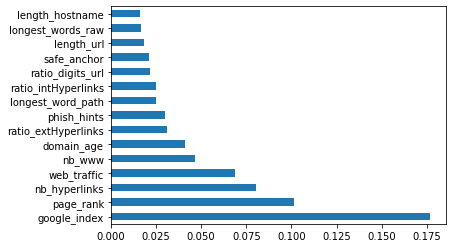

In [20]:
ranked_features=pd.Series(feature_importances,index=x_train.columns)
ranked_features.nlargest(15).plot(kind='barh') # considering top "15" columns based on their feature importances
plt.show()

In [21]:
features_selected =ranked_features.nlargest(10)
col = features_selected.index

## Modelling:

 - on the selected features(top 15)
 - Performing multiple models and observing their classification reports

In [22]:
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train[col], y_train)
ypred = logistic_regression.predict(x_test[col])
yproba = logistic_regression.predict_proba(x_test[col])
print(confusion_matrix(y_test, ypred))
print(classification_report(y_test, ypred))
fpr, tpr, _ = roc_curve(y_test, yproba[:,1])
auc = roc_auc_score(y_test, yproba[:,1])

[[1416  299]
 [ 908  806]]
              precision    recall  f1-score   support

           0       0.61      0.83      0.70      1715
           1       0.73      0.47      0.57      1714

    accuracy                           0.65      3429
   macro avg       0.67      0.65      0.64      3429
weighted avg       0.67      0.65      0.64      3429



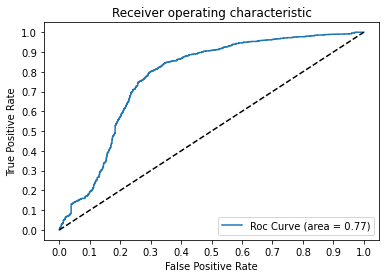

In [23]:
plt.plot(fpr, tpr, label = 'Roc Curve (area = %0.2f)'%auc )
plt.plot([0, 1], [0, 1], 'k--') 
plt.xticks(np.arange(0.0,1.1, step = 0.1)) 
plt.yticks(np.arange(0.0,1.1, step = 0.1))
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic') 
plt.legend(loc="lower right") 
plt.show()

In [24]:
dr = DecisionTreeClassifier()
dr.fit(x_train[col], y_train)
ypred1 = dr.predict(x_test[col])
print(confusion_matrix(y_test, ypred1))
print(classification_report(y_test, ypred1))

[[1575  140]
 [ 115 1599]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1715
           1       0.92      0.93      0.93      1714

    accuracy                           0.93      3429
   macro avg       0.93      0.93      0.93      3429
weighted avg       0.93      0.93      0.93      3429



In [25]:
rfclf = RandomForestClassifier()
rfclf.fit(x_train[col], y_train)
ypred2 = rfclf.predict(x_test[col])
print(confusion_matrix(y_test, ypred2))
print(classification_report(y_test, ypred2))

[[1617   98]
 [  71 1643]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1715
           1       0.94      0.96      0.95      1714

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



In [26]:

xgb = XGBClassifier()
xgb.fit(x_train[col], y_train)
ypred3 = xgb.predict(x_test[col])
print(confusion_matrix(y_test, ypred3))
print(classification_report(y_test, ypred3))

[00:10:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1632   83]
 [  75 1639]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1715
           1       0.95      0.96      0.95      1714

    accuracy                           0.95      3429
   macro avg       0.95      0.95      0.95      3429
weighted avg       0.95      0.95      0.95      3429



## Model comparsions using ROC curve Analysis

In [27]:
classifiers = [LogisticRegression() ,DecisionTreeClassifier(), RandomForestClassifier(class_weight = 'balanced_subsample'), XGBClassifier()]
result_table = pd.DataFrame(columns = ['classifiers','fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(x_train[col], y_train)
    yproba = model.predict_proba(x_test[col])[::,1]
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__ ,
                                       'fpr': fpr,
                                       'tpr': tpr,
                                       'auc': auc}, ignore_index = True)
result_table.set_index('classifiers', inplace = True)

[00:10:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0005830903790087463, 0.000583090379008...","[0.0, 0.0, 0.009334889148191364, 0.00933488914...",0.774805
DecisionTreeClassifier,"[0.0, 0.08104956268221575, 0.08163265306122448...","[0.0, 0.927071178529755, 0.9294049008168028, 1.0]",0.924062
RandomForestClassifier,"[0.0, 0.0029154518950437317, 0.004081632653061...","[0.0, 0.5204200700116686, 0.6137689614935823, ...",0.986626
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0005834305717619603, 0.005250875145857...",0.987916


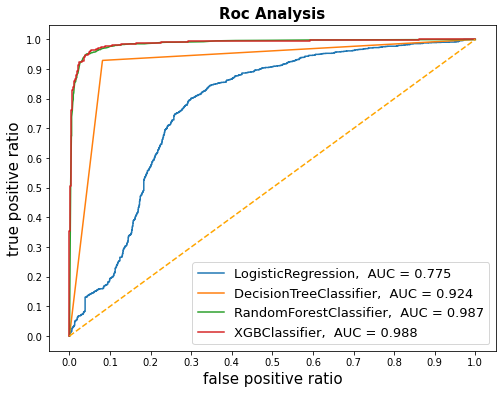

In [29]:
fig = plt.figure(figsize = (8,6))
for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
            result_table.loc[i]['tpr'],
            label = '{},  AUC = {:.3f}'.format(i, result_table.loc[i]['auc']))
plt.plot([0,1],[0,1], color = 'orange', linestyle ='--')
plt.xticks(np.arange(0.0,1.1,step = 0.1))
plt.xlabel('false positive ratio', fontsize = 15)
plt.yticks(np.arange(0.0,1.1,step = 0.1))
plt.ylabel('true positive ratio', fontsize = 15)
plt.title('Roc Analysis', fontweight = 'bold', fontsize = 15)
plt.legend(prop = {'size': 13}, loc = 'lower right')
plt.show()

#### **we can conclude that RandomForestClassifier and XGBClassifier giving high accuracy but generally it may be due to overfitting also. So, it's safe to consider that our best model is DecisionTreeClassfier**